In [48]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/386.6 kB ? eta -:--:--
   -------------------- ------------------- 194.6/386.6 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 386.6/386.6 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/242.5 kB ? eta -:--:--
   -------------------------------------- - 235.5/242.5 kB ? eta -:--:--
   ---------------------------------------- 242.5/242.5 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ------------------------------------ --- 71.7/78.5 kB ? eta -:--:--
   ------------------------------------ --- 71.7/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 626.3 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


link do kaggle : https://www.kaggle.com/code/kawsarahmad/calorie-expenditure-using-ml , best score 0.05724


In [2]:
import os 
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from xgboost import XGBRegressor
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.startswith('train'):
            train_file = os.path.join(dirname, filename)
        elif filename.startswith('test'):
            test_file = os.path.join(dirname, filename)
        elif filename.startswith('sample'):
            sample_file = os.path.join(dirname, filename)

In [4]:
train=pd.read_csv(train_file)
test=pd.read_csv(test_file)
sample=pd.read_csv(sample_file)

In [5]:
train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

In [7]:
train['FCM']=train['Age'].apply(lambda x: 220-x)

In [8]:
train['%FCM']=train['Heart_Rate']/train['FCM']*100


In [9]:
train.head(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,FCM,%FCM
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0,184,54.891304
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0,156,54.487179
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0,169,49.704142
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0,200,52.500000
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0,182,56.043956


In [10]:
#drop na coluna id
train.drop(columns=['id'], inplace=True)

In [11]:
train.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories', 'FCM', '%FCM'],
      dtype='object')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  int32  
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
 8   FCM         750000 non-null  int64  
 9   %FCM        750000 non-null  float64
dtypes: float64(7), int32(1), int64(2)
memory usage: 54.4 MB


In [13]:
train.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
FCM           0
%FCM          0
dtype: int64

In [14]:
train.describe()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,FCM,%FCM
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,0.499039,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781,178.579596,53.885487
std,0.499999,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349,15.175049,7.298165
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000,141.000000,33.500000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000,168.000000,48.730964
50%,0.000000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000,180.000000,53.260870
75%,1.000000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000,192.000000,58.285714
max,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000,200.000000,90.780142


In [15]:
colunas=list(train.columns)
colunas.remove('Calories')

C:\Users\gpira\AppData\Local\Temp\ipykernel_19816\1743618766.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


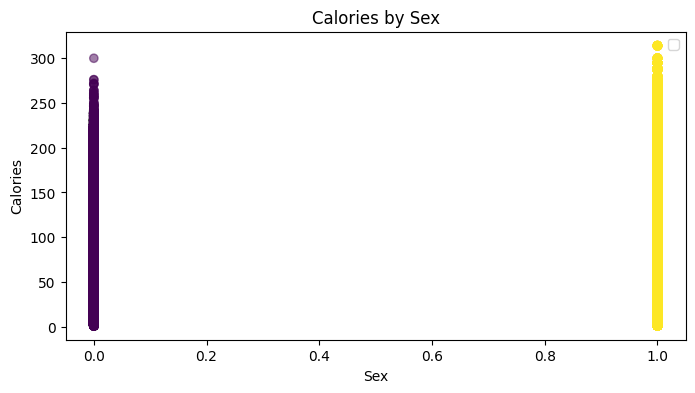

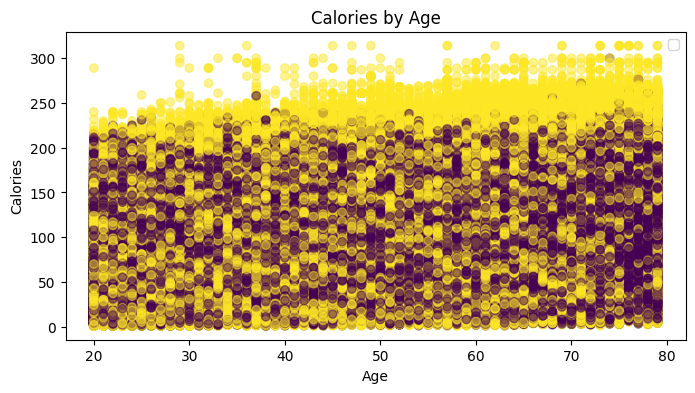

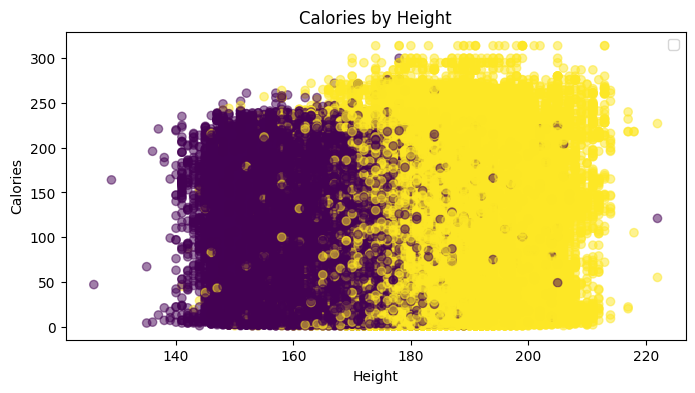

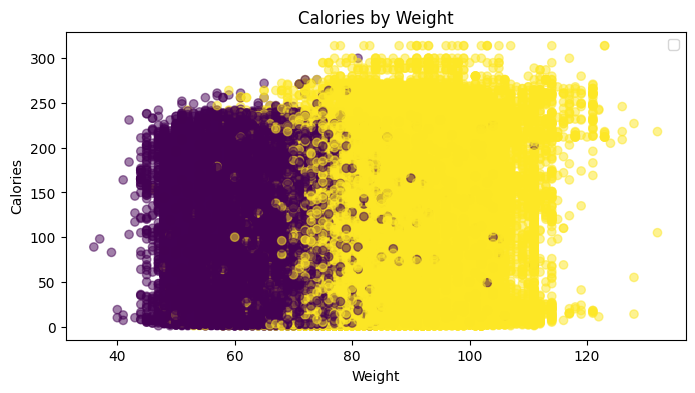

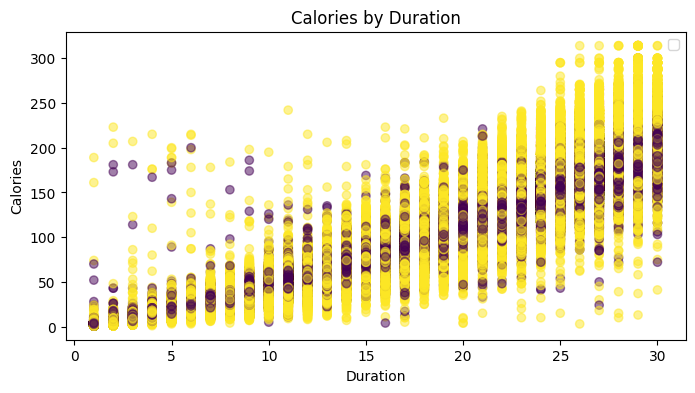

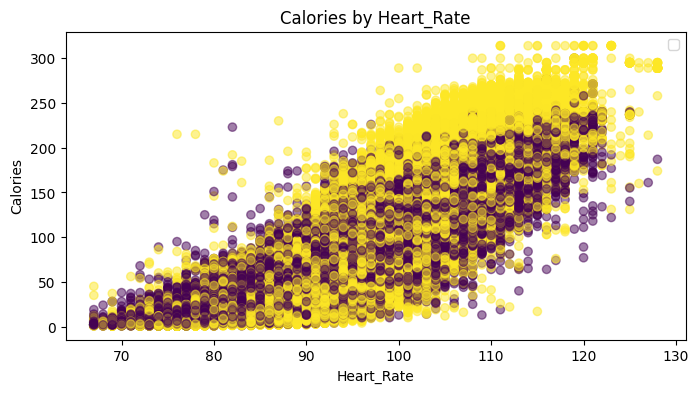

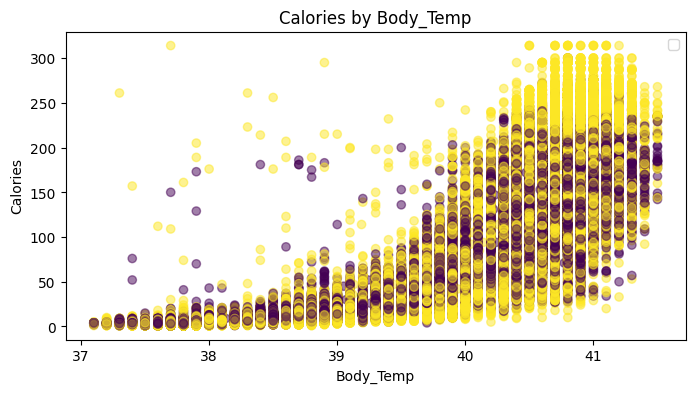

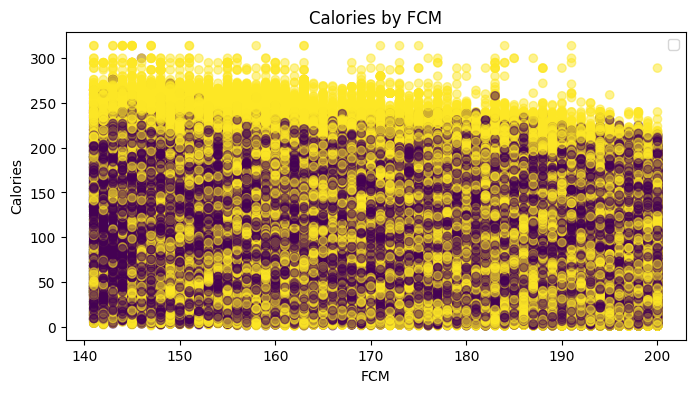

KeyboardInterrupt: 

In [16]:
grouped={}
for category in colunas:
    grouped[category]= train.groupby(category)['Calories'].mean().reset_index()

for category in colunas:
    plt.figure(figsize=(8, 4))
    plt.scatter(train[category], train['Calories'], c=train['Sex'],alpha=0.5)
    plt.title('Calories by {}'.format(category))
    plt.xlabel(category)
    plt.ylabel('Calories')
    plt.legend()
    plt.show()
    


Next Steps:
1- understand better the target variable and plot with more than 1 category by time.
for example:    (BodyTemp + Gender) by calories


C:\Users\gpira\AppData\Local\Temp\ipykernel_19816\1749188176.py:2: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.violinplot(x='Sex', y='Calories', data=train,palette=color_palette)


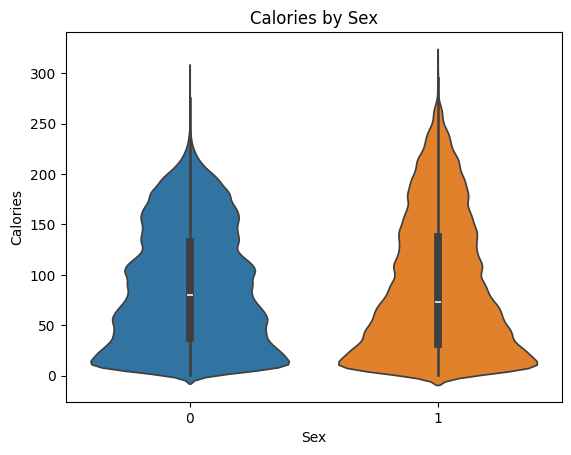

In [17]:
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
sns.violinplot(x='Sex', y='Calories', data=train,palette=color_palette)
plt.title('Calories by Sex')
plt.show()

In [18]:
# Encode variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])



Calculates the Body Mass Index (BMI) using the formula:

BMI
=
Weight (kg)
(
Height (cm)
100
)
2
BMI= 
( 
100
Height (cm)
​
 ) 
2
 
Weight (kg)
​
 
Height is divided by 100 to convert from centimeters to meters.



In [20]:
train['BMI'] = train['Weight'] / ((train['Height'] / 100) ** 2)


In [21]:
train['HR_per_min'] = train['Heart_Rate'] / train['Duration']


In [22]:
train['Temp_diff_from_norm'] = train['Body_Temp'] - 37.0


In [23]:
#the same for test dataset
test['Sex'] = le.fit_transform(test['Sex'])
test['BMI'] = test['Weight'] / ((test['Height'] / 100) ** 2)
test['HR_per_min'] = test['Heart_Rate'] / test['Duration']
test['Temp_diff_from_norm'] = test['Body_Temp'] - 37.0

test['FCM']=test['Age'].apply(lambda x: 220-x)
test['%FCM']=test['Heart_Rate']/test['FCM']*100



In [24]:
#Remove the target variable from the test dataset
# train.drop(columns=['Calories'], inplace=True)
colunas= list(train.columns)
for col in colunas:
    print(f"\nAverage {col} by Sex:")
    print(train.groupby('Sex')[col].mean().round(2))
    print("-"*30)



Average Sex by Sex:
Sex
0    0.0
1    1.0
Name: Sex, dtype: float64
------------------------------

Average Age by Sex:
Sex
0    41.27
1    41.57
Name: Age, dtype: float64
------------------------------

Average Height by Sex:
Sex
0    165.02
1    184.41
Name: Height, dtype: float64
------------------------------

Average Weight by Sex:
Sex
0    63.73
1    86.61
Name: Weight, dtype: float64
------------------------------

Average Duration by Sex:
Sex
0    15.50
1    15.34
Name: Duration, dtype: float64
------------------------------

Average Heart_Rate by Sex:
Sex
0    95.40
1    95.57
Name: Heart_Rate, dtype: float64
------------------------------

Average Body_Temp by Sex:
Sex
0    40.05
1    40.02
Name: Body_Temp, dtype: float64
------------------------------

Average Calories by Sex:
Sex
0    87.53
1    89.03
Name: Calories, dtype: float64
------------------------------

Average FCM by Sex:
Sex
0    178.73
1    178.43
Name: FCM, dtype: float64
------------------------------

Avera

In [25]:
drop_col = 'Calories'
X = train.drop(columns=[drop_col])
y = np.log1p(train[drop_col].values)

In [26]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

### Primeiro modelo simples 'RandomForestRegressor'


In [27]:
# Model training
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100,criterion='squared_error', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [28]:
#Evaluate the model
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse, r2

(0.2511690770265172, 0.9957213619705638)

In [29]:
rmse

0.2511690770265172

Second Test => XGBOOST


In [47]:
modelXgboost=XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=14, random_state=42)
modelXgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
xgpred=modelXgboost.predict(X_test)

In [46]:
#Evaluate the model
rmse = np.sqrt(root_mean_squared_error(y_test, xgpred))
r2 = r2_score(y_test, xgpred)
rmse, r2

(0.2544605402912073, 0.9954926358296797)

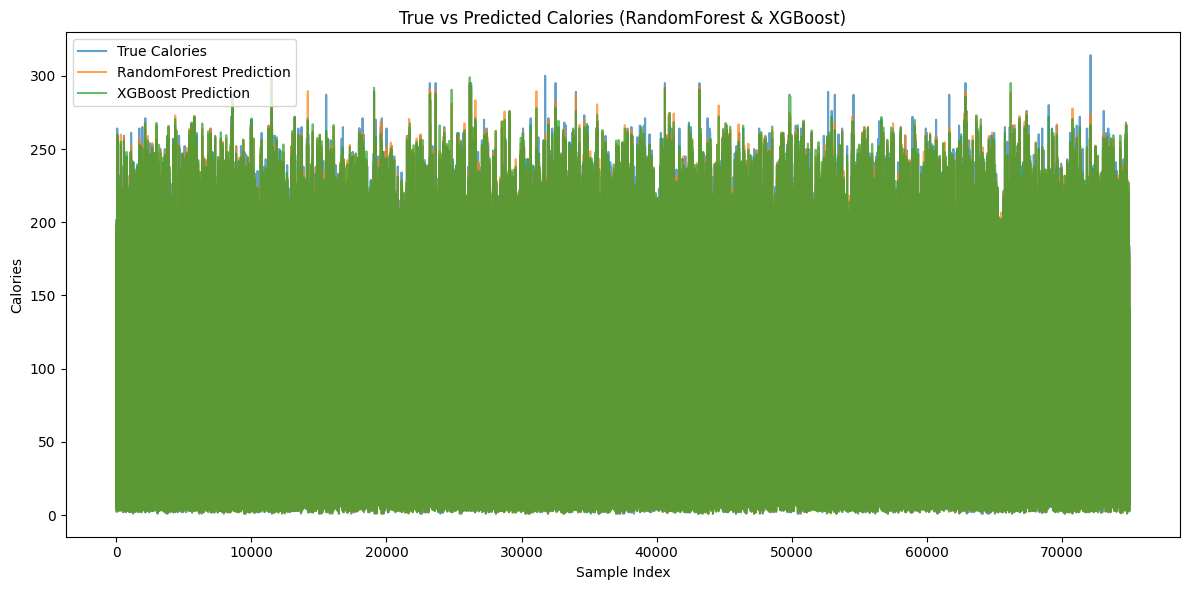

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(np.expm1(y_test), label='True Calories', alpha=0.7)
plt.plot(np.expm1(y_pred), label='RandomForest Prediction', alpha=0.7)
plt.plot(np.expm1(xgpred), label='XGBoost Prediction', alpha=0.7)
plt.title('True vs Predicted Calories (RandomForest & XGBoost)')
plt.xlabel('Sample Index')
plt.ylabel('Calories')
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

c:\Users\gpira\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [61]:
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


def objective(trial):
    param = {
        "verbosity": 0,  # Suppress warnings
        "objective": "reg:squarederror",  # For RMSE
        "eval_metric": "rmse",
        "tree_method": "hist",  # Fast CPU training
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "lambda": trial.suggest_float("lambda", 1e-8, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 10.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10)
    }

    # Use the already split data: X_train, y_train, X_valid, y_valid
    model = xgb.XGBRegressor(**param)
    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        # early_stopping_rounds=25,
        verbose=False
    )

    preds = model.predict(X_valid)
    mse = mean_squared_error(y_true, y_pred)
        
    rmse = np.sqrt(mse)
    return rmse  # Optuna will minimize this






In [59]:
study = optuna.create_study(direction="minimize")  # Minimize RMSE
study.optimize(objective, timeout=600)  # e.g. 50 trials or 10 min

print("Best RMSE:", study.best_value)
print("Best params:", study.best_trial.params)


[I 2025-05-25 23:54:44,257] A new study created in memory with name: no-name-d9065b06-b59d-46d1-8755-4aa6dd2266fb
[W 2025-05-25 23:55:53,132] Trial 0 failed with parameters: {'max_depth': 11, 'learning_rate': 0.058162605762187146, 'n_estimators': 863, 'subsample': 0.8574720689868784, 'colsample_bytree': 0.5930789813782827, 'lambda': 0.014228421319850392, 'alpha': 0.00956183987988431, 'min_child_weight': 8} because of the following error: TypeError("got an unexpected keyword argument 'squared'").
Traceback (most recent call last):
  File "c:\Users\gpira\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\gpira\AppData\Local\Temp\ipykernel_19816\2009892874.py", line 34, in objective
    rmse = mean_squared_error(y_valid, preds, squared=False)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gpira\AppData\Local\Programs

TypeError: got an unexpected keyword argument 'squared'

In [60]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\gpira\appdata\local\programs\python\python311\lib\site-packages (1.6.0)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0



  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
